## Introduction to Lending Club Loan Data Analysis
This project focuses on analyzing historical loan data from the Lending Club platform, spanning from 2007 to 2015. Lending Club connects borrowers with investors through an online marketplace, where borrowers receive loans and investors can purchase notes backed by payments made on loans. The objective of this analysis is to leverage machine learning techniques to predict the likelihood of loan defaults based on various borrower and loan characteristics.

Utilizing a dataset that encompasses a wide array of information, including borrower credit history, loan details, and repayment status, we aim to identify patterns and insights that can inform investment decisions and risk management strategies. Through comprehensive data preprocessing, exploratory data analysis (EDA), and the application of deep learning models, this project seeks to not only predict loan defaults with high accuracy but also uncover the underlying factors contributing to borrower default rates.

By harnessing the capabilities of Python, pandas for data manipulation, matplotlib and seaborn for visualization, and Keras with TensorFlow as the backend for modeling, we will navigate through the data analysis process. This journey will take us from initial data loading and cleaning to sophisticated model building and evaluation, with the ultimate goal of enhancing the predictive capabilities within the domain of peer-to-peer lending.

## Data Loading and Initial Exploration
In this section, we begin our analysis by importing necessary libraries and loading our dataset. The dataset in question contains comprehensive loan data from the Lending Club platform, which includes both borrower information and loan performance metrics. Our primary library for handling data is pandas, a powerful tool for data manipulation and analysis in Python.

In [9]:
import pandas as pd

# Load the loan data CSV file
loan_data_path = 'loan_data.csv'
loan_data = pd.read_csv(loan_data_path)

After loading the data, it's crucial to get a preliminary view of its structure to understand the types of information available and to start thinking about potential preprocessing steps. The .head() method allows us to peek at the first few rows of our DataFrame:

In [10]:
# Displaying the first few rows of the loan data to understand its structure
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Statistical Summary of the Dataset

The next step in our data exploration is to obtain a statistical summary of the dataset, which is crucial for understanding the numerical features in more depth. This involves utilizing the `.describe()` method on our `loan_data` DataFrame. This method provides a quick overview of the descriptive statistics for all numerical columns.

In [11]:
loan_data.describe

<bound method NDFrame.describe of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.0

## One-Hot Encoding of Categorical Variables

In this section, we address the challenge of converting categorical data into a format that can be provided to ML algorithms to do a better job in prediction. The `purpose` column of our dataset, which categorizes the reason for the loan, is a prime candidate for this transformation. Since machine learning models require numerical input, categorical variables like `purpose` need to be transformed.

We employ one-hot encoding to tackle this, a process that converts categorical variables into a form that could be provided to ML algorithms to improve prediction accuracy. This is achieved using the `OneHotEncoder` class from `sklearn.preprocessing`. One-hot encoding creates a binary column for each category and returns a sparse matrix or dense array (depending on the `sparse` parameter) indicating the presence of a category with `1` and `0` otherwise.


In [12]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding the 'purpose' column as it's a categorical variable
encoder = OneHotEncoder(sparse=False)
encoded_purpose = encoder.fit_transform(loan_data[['purpose']])

/voc/work/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Integrating Encoded Data with Original Dataset

After successfully applying one-hot encoding to the `purpose` column, the next step involves integrating this transformed data back into our original loan dataset. This process is crucial for maintaining a comprehensive dataset that includes our newly encoded categorical variables, thereby enhancing the dataset's utility for machine learning models.

### Creating a DataFrame from Encoded Data

First, we construct a new DataFrame from the encoded data. This is achieved by converting the encoded array returned by `OneHotEncoder` into a pandas DataFrame. Each column in this new DataFrame represents a category from the original `purpose` column, now encoded as a separate feature for our model:

In [13]:
# Creating a DataFrame from the encoded data
encoded_purpose_df = pd.DataFrame(encoded_purpose, columns=encoder.get_feature_names_out(['purpose']))

## Merging Encoded Data with Original Loan Data
Next, we merge this new DataFrame with our original loan data. This step is critical to ensure that our dataset remains intact and is enhanced with the addition of the encoded categorical features.

In [14]:

# Merging the encoded DataFrame back with the original loan data
transformed_loan_data = loan_data.join(encoded_purpose_df)

## Dropping Redundant Columns
With the encoded purpose column now integrated into our dataset, the original purpose column becomes redundant. To maintain data cleanliness and efficiency, we remove this column from our dataset

In [15]:

# Dropping the original 'purpose' column as it's now redundant
transformed_loan_data.drop('purpose', axis=1, inplace=True)

## Previewing Transformed Data
Finally, to verify the success of our data transformation process, we display the first few rows of our transformed dataset. This step confirms the integration of the encoded features and the removal of the redundant column

In [16]:
# Displaying the first few rows of the transformed data
transformed_loan_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Saving Transformed Dataset

After completing the data transformation and encoding processes, it's crucial to save our progress. This not only allows for easy sharing and further analysis but also serves as a checkpoint in our data processing pipeline. To achieve this, we export the transformed loan data to a new CSV file. This ensures that our modifications, including the integration of encoded features and removal of redundant columns, are preserved for future use or analysis.

The following code snippet demonstrates how to save the transformed dataset to a CSV file, ensuring that the index is not included in the file, for a cleaner dataset and then view the path of the newly saved csv file.

In [17]:
# Saving the transformed data to a new CSV file
transformed_loan_data_path = 'transformed_loan_data.csv'
transformed_loan_data.to_csv(transformed_loan_data_path, index=False)

transformed_loan_data_path

'transformed_loan_data.csv'

## Visualizing Descriptive Statistics

To further our understanding of the transformed dataset, we turn to descriptive statistics, which offer insights into the central tendency, dispersion, and shape of a dataset's distribution. However, beyond numerical summaries, visualizations play a crucial role in data analysis by providing a more intuitive grasp of the dataset's characteristics. 

For this purpose, we employ two powerful Python libraries:

- `matplotlib`: A comprehensive library for creating static, animated, and interactive visualizations in Python.
- `seaborn`: Based on matplotlib, seaborn provides a high-level interface for drawing attractive and informative statistical graphics.

The following code snippet calculates the descriptive statistics for our transformed loan data, setting the stage for subsequent visualization.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
descriptive_stats = transformed_loan_data.describe()

## Visualizing the Distribution of Key Numerical Features

Understanding the distribution of various numerical features within our dataset is a fundamental aspect of exploratory data analysis (EDA). It allows us to grasp the spread, skewness, and general trend of the data points for each feature, which is invaluable for identifying patterns, outliers, and potential biases in our dataset.

To visualize these distributions, we utilize histograms for each of the key numerical features. Histograms are powerful graphical representations that summarize data by grouping values into bins and displaying the frequency of observations within each bin. This method provides a clear visualization of the distribution's shape, central tendency, and variability.

The key numerical features we focus on include:
- Interest Rate (`int.rate`)
- Installment amount (`installment`)
- Log of Annual Income (`log.annual.inc`)
- Debt-to-Income Ratio (`dti`)
- FICO credit score (`fico`)
- Days with Credit Line (`days.with.cr.line`)

For each feature, we generate a histogram enhanced with a Kernel Density Estimate (KDE) to visualize the probability density of the data. This combination offers a more nuanced view of the distribution, highlighting the main modes, spread, and tails of each feature's distribution.


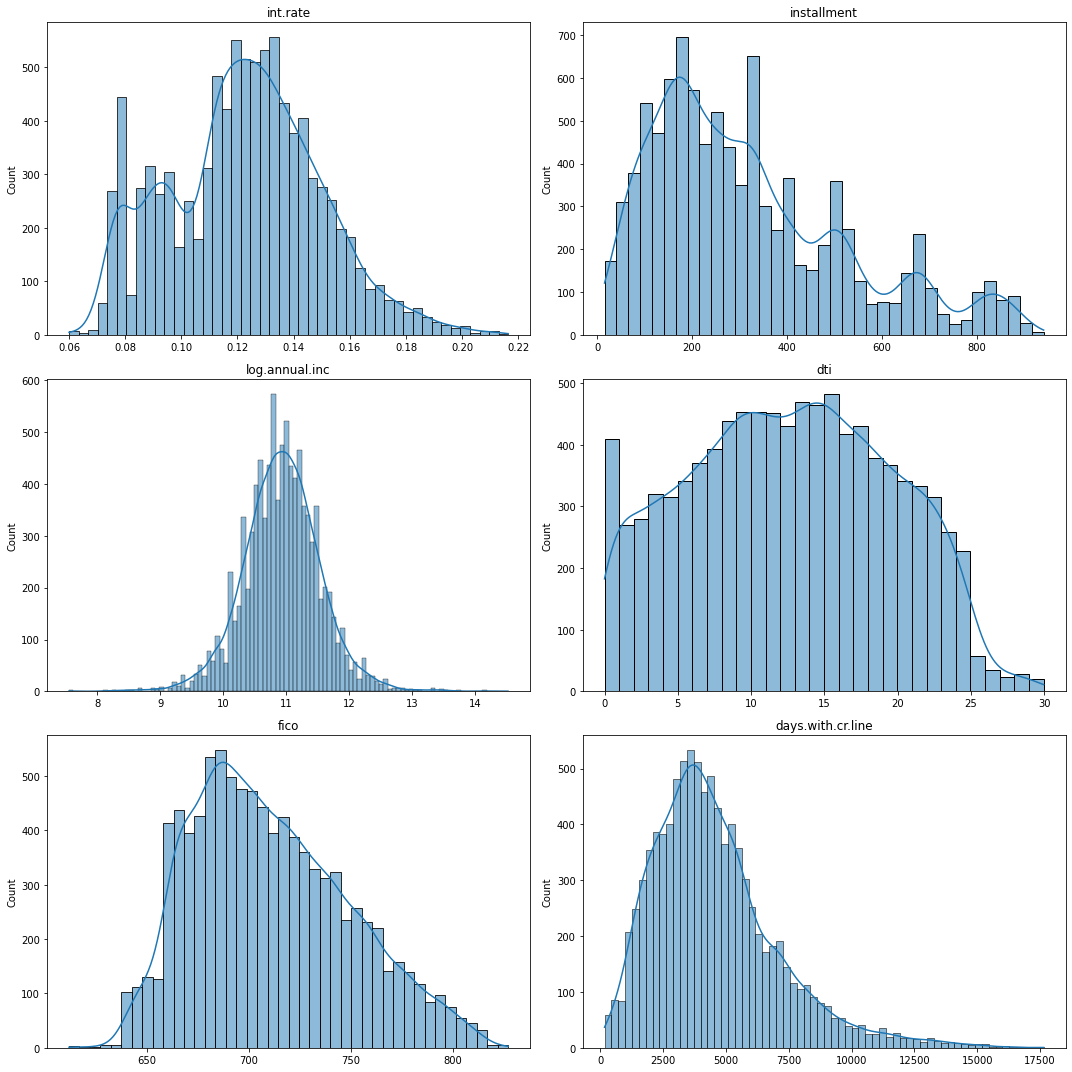

In [19]:
# Distribution of Key Numerical Features
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
numerical_features = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line']
for i, ax in enumerate(axes.flatten()):
    sns.histplot(transformed_loan_data[numerical_features[i]], kde=True, ax=ax)
    ax.set_title(numerical_features[i])
    ax.set_xlabel('')
plt.tight_layout()


## Correlation Analysis Among Numerical Features

Correlation analysis is an essential step in the exploratory data analysis process, providing insights into the relationships between numerical features in our dataset. By understanding these relationships, we can identify features that might influence each other, which is crucial for both feature selection and for designing our predictive models.

The correlation coefficient ranges from -1 to 1, where:
- **1 indicates a perfect positive correlation:** as one variable increases, the other variable increases at a constant rate.
- **-1 indicates a perfect negative correlation:** as one variable increases, the other decreases at a constant rate.
- **0 indicates no correlation:** there's no linear relationship between the variables.

In this analysis, we compute the Pearson correlation coefficient for each pair of numerical features in our transformed loan dataset. This coefficient measures the linear correlation between variables, giving us a comprehensive view of how features relate to one another.

In [20]:
# Correlation Analysis
correlation_matrix = transformed_loan_data.corr()

## Visualization of Categorical Data

Categorical data visualization is essential for understanding the distribution of categorical variables within our dataset. It provides insights into the prevalence of different categories, which can be crucial for identifying trends, biases, or imbalances that might affect the performance of machine learning models.

In this section, we focus on visualizing a subset of categorical features related to the purpose of the loan. These include:
- Credit card purposes (`purpose_credit_card`)
- Debt consolidation purposes (`purpose_debt_consolidation`)
- Small business purposes (`purpose_small_business`)
- Educational purposes (`purpose_educational`)

For each of these features, we utilize count plots to visualize the frequency of each category. Count plots are straightforward yet powerful visual tools that display the counts of observations in each categorical bin using bars.

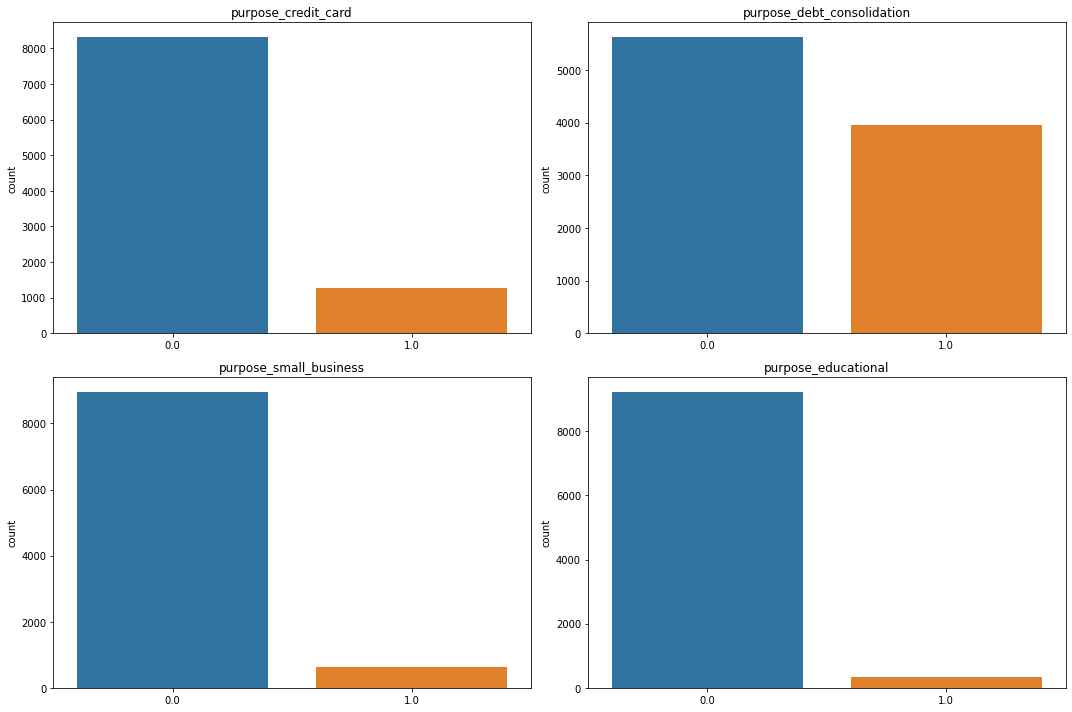

In [21]:
# Distribution of Categorical Data
# Since there are multiple categorical columns, I've selected a few for visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
categorical_features = ['purpose_credit_card', 'purpose_debt_consolidation', 'purpose_small_business', 'purpose_educational']
for i, ax in enumerate(axes.flatten()):
    sns.countplot(x=transformed_loan_data[categorical_features[i]], ax=ax)
    ax.set_title(categorical_features[i])
    ax.set_xlabel('')
plt.tight_layout()


## Target Variable Analysis: Loan Repayment Status

Understanding the distribution of our target variable is a pivotal aspect of any machine learning project. For this project, our target variable is `not.fully.paid`, which indicates whether a loan has not been fully repaid (1) or has been fully repaid (0). Analyzing the distribution of this variable is crucial for several reasons:
- **Modeling Insight:** It helps in understanding the balance or imbalance between the classes, which can significantly influence the choice of model, evaluation metrics, and techniques to address class imbalance.
- **Business Insight:** It provides insights into the proportion of loans that tend to not be fully repaid, offering a glimpse into the risk profile associated with lending activities.

The following code snippet utilizes `matplotlib` and `seaborn` to create a count plot visualizing the frequency of each category within the `not.fully.paid` target variable.

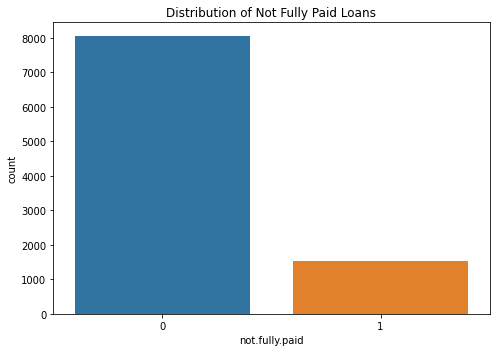

In [22]:
# Target Variable Analysis
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x=transformed_loan_data['not.fully.paid'])
ax.set_title('Distribution of Not Fully Paid Loans')
plt.tight_layout()

plt.show()

## Analysis of the Target Variable: Not Fully Paid Loans

Understanding the distribution of our target variable is fundamental to the success of any predictive modeling project. In this case, our target variable is whether a loan has not been fully paid (`not.fully.paid`). Analyzing this variable allows us to grasp the balance or imbalance between the classes, which is crucial for selecting appropriate modeling techniques and evaluation metrics.

The following visualization uses a count plot to show the distribution of loans based on their repayment status:
- `0` indicates loans that have been fully paid.
- `1` represents loans that have not been fully paid.

In [23]:
# Returning the descriptive statistics and correlation matrix for further analysis
descriptive_stats, correlation_matrix

(       credit.policy     int.rate  installment  log.annual.inc          dti  \
 count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
 mean        0.804970     0.122640   319.089413       10.932117    12.606679   
 std         0.396245     0.026847   207.071301        0.614813     6.883970   
 min         0.000000     0.060000    15.670000        7.547502     0.000000   
 25%         1.000000     0.103900   163.770000       10.558414     7.212500   
 50%         1.000000     0.122100   268.950000       10.928884    12.665000   
 75%         1.000000     0.140700   432.762500       11.291293    17.950000   
 max         1.000000     0.216400   940.140000       14.528354    29.960000   
 
               fico  days.with.cr.line     revol.bal   revol.util  \
 count  9578.000000        9578.000000  9.578000e+03  9578.000000   
 mean    710.846314        4560.767197  1.691396e+04    46.799236   
 std      37.970537        2496.930377  3.375619e+04    29.014417   
 m

### Scaling Numerical Features

Before modeling, it's essential to scale numerical features to ensure that our model treats all features equally. This step involves standardizing the range of continuous input variables so that each feature contributes proportionately to the final prediction. We employ `StandardScaler` for this purpose, which normalizes the features to have a mean of 0 and a standard deviation of 1.

In [24]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# List of numerical features to scale
numerical_features = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']

# Applying the scaler to the numerical features
transformed_loan_data[numerical_features] = scaler.fit_transform(transformed_loan_data[numerical_features])

### Splitting the Dataset

After preparing our features, the next step is to split the dataset into a set of features (`X`) and the target variable (`y`). Furthermore, we divide the data into training and testing sets. This approach allows our model to learn from one subset of the data and then be evaluated on a separate subset, ensuring that our performance metrics reflect how the model will perform on unseen data.

In [25]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into features and the target variable
X = transformed_loan_data.drop('not.fully.paid', axis=1)
y = transformed_loan_data['not.fully.paid']

# Further splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Handling Imbalanced Data

Our dataset exhibits an imbalance in the distribution of the target variable, which can bias the model towards the majority class. To address this, we use `SMOTE` (Synthetic Minority Over-sampling Technique) to oversample the minority class in the training set, aiming to balance the class distribution and improve model performance on minority class predictions.

In [26]:
from imblearn.over_sampling import SMOTE

# Initializing SMOTE
sm = SMOTE(random_state=42)

# Applying SMOTE to the training data
X_train, y_train = sm.fit_resample(X_train, y_train)

### Model Building and Evaluation

With our data prepared and balanced, we proceed to build and evaluate our model. We choose the `Random Forest Classifier` for its versatility and robustness in handling both linear and non-linear data. After training the model with the training set, we assess its performance on the testing set using several metrics: accuracy, classification report, and confusion matrix. These metrics provide a comprehensive view of the model's predictive capabilities and areas for improvement.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Building the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the evaluation metrics
accuracy, report, conf_matrix

(0.8011482254697286,
 '              precision    recall  f1-score   support\n\n           0       0.85      0.92      0.89      1611\n           1       0.28      0.16      0.21       305\n\n    accuracy                           0.80      1916\n   macro avg       0.57      0.54      0.55      1916\nweighted avg       0.76      0.80      0.78      1916\n',
 array([[1485,  126],
        [ 255,   50]]))

## Model Building with Class Weight Adjustment

Addressing imbalances in the dataset is a critical challenge in machine learning, especially in classification problems where the distribution of classes can significantly impact the model's performance. One effective approach to mitigate this issue is adjusting the class weights. This method assigns a higher weight to less represented classes, encouraging the model to pay more attention to these during training.

### Adjusting Class Weights

For our Random Forest Classifier, we adjust the class weights to 'balanced'. This adjustment tells the model to increase the importance of minority class examples, aiming to improve model fairness and performance on imbalanced data.

In [28]:
# Adjusting class weights
model_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
model_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

## Prediction and Evaluation with the Balanced Model
After training the model with adjusted class weights, we proceed to make predictions on the test set. The performance of this model is then evaluated using accuracy, classification report, and confusion matrix, providing a comprehensive view of its effectiveness in predicting not fully paid loans with a more balanced approach.

In [29]:
# Predicting the Test set results with the new model
y_pred_balanced = model_balanced.predict(X_test)

# Evaluating the Balanced Model
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
report_balanced = classification_report(y_test, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)

# Displaying the evaluation metrics
accuracy_balanced, report_balanced, conf_matrix_balanced

(0.8011482254697286,
 '              precision    recall  f1-score   support\n\n           0       0.85      0.92      0.89      1611\n           1       0.28      0.16      0.21       305\n\n    accuracy                           0.80      1916\n   macro avg       0.57      0.54      0.55      1916\nweighted avg       0.76      0.80      0.78      1916\n',
 array([[1485,  126],
        [ 255,   50]]))

## Optimizing Model Parameters with GridSearchCV

Fine-tuning the hyperparameters of a model can significantly enhance its performance. To systematically explore a range of parameters and determine the optimal combination, we utilize `GridSearchCV` from `sklearn.model_selection`. This method performs an exhaustive search over specified parameter values for an estimator, using cross-validation to evaluate each combination's performance.

### Setting Up Parameter Grid

We define a parameter grid for the `RandomForestClassifier`, specifying a range of values for `n_estimators` (number of trees in the forest), `max_depth` (maximum depth of the tree), `min_samples_split` (minimum number of samples required to split an internal node), and `min_samples_leaf` (minimum number of samples required to be at a leaf node).

In [30]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

### Executing Grid Search
With the parameter grid established, we initiate the grid search, specifying the RandomForestClassifier as the estimator, the parameter grid, the number of folds for cross-validation, and setting n_jobs to -1 to use all available processor cores for faster computation.

In [31]:

# Setting up the Grid Search with a RandomForestClassifier and the parameter grid
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3,  # Number of cross-validation folds
                           n_jobs=-1,  # Use all available cores
                           verbose=2)

# Fitting the Grid Search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   7.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   6.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   6.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_s

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

### Best Parameters
After completing the grid search, we extract the best parameters found, providing valuable insights into the most effective settings for our RandomForestClassifier model.

In [32]:
# Best parameters found by Grid Search
best_params = grid_search.best_params_
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

### Re-importing Libraries and Reloading Data

After a reset of the code execution state, it's crucial to ensure all necessary libraries are re-imported and the dataset is reloaded. This step establishes the foundation for subsequent analysis and model optimization.

- **Libraries:** Re-import `pandas` for data manipulation, `StandardScaler` for feature scaling, and relevant `sklearn` modules for model selection and evaluation.
- **Data Reload:** The transformed loan data is reloaded from a CSV file, ensuring continuity in our analysis.

In [33]:
# Re-importing necessary libraries and redefining variables after code execution state reset
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Reload the transformed data
transformed_loan_data_path = 'transformed_loan_data.csv'
transformed_loan_data = pd.read_csv(transformed_loan_data_path)


### Preparing the Data

Before diving into model optimization, the dataset undergoes preparation steps, including feature scaling and splitting into training and testing sets. These steps are pivotal for enhancing model performance and evaluation accuracy.

- **Feature Scaling:** Standardizes the numerical features to have a mean of 0 and a standard deviation of 1.
- **Data Splitting:** Segregates the dataset into features (`X`) and target variable (`y`), and further into training and testing sets.

In [34]:
# Redefine the numerical features list
numerical_features = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']

# Scaling Numerical Features
scaler = StandardScaler()
transformed_loan_data[numerical_features] = scaler.fit_transform(transformed_loan_data[numerical_features])

# Splitting the dataset into features and target variable
X = transformed_loan_data.drop('not.fully.paid', axis=1)
y = transformed_loan_data['not.fully.paid']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Simplified Grid Search Setup

The Grid Search is a systematic approach to tuning hyperparameters, ensuring the selection of the best parameters for the model. This process involves:
- **Parameter Grid:** Specifies the hyperparameters to test.
- **Model Selection:** Uses `RandomForestClassifier` with adjusted class weights to handle imbalanced data.
- **Cross-Validation:** Ensures robustness and generalizability of the model performance.

In [35]:

# Simplified Grid Search setup
simplified_param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [10, 20, None],  # Maximum depth of the tree
}

# Setting up the simplified Grid Search
simplified_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'), 
                                      param_grid=simplified_param_grid, 
                                      cv=3,  # Number of cross-validation folds
                                      n_jobs=-1,  # Use all available cores
                                      verbose=2)

# Fitting the Grid Search to the data
simplified_grid_search.fit(X_train, y_train)

# Best parameters found by the simplified Grid Search
best_params_simplified = simplified_grid_search.best_params_
best_params_simplified

Fitting 3 folds for each of 6 candidates, totalling 18 fits


{'max_depth': None, 'n_estimators': 200}

## Data Preparation and Feature Importance Analysis with RandomForestClassifier

This section outlines the process of re-importing necessary libraries, reloading the loan data, applying one-hot encoding to categorical variables, scaling numerical features, splitting the data for model training, and analyzing feature importances using a `RandomForestClassifier`. Each step is crucial for ensuring the data is appropriately preprocessed for machine learning modeling and for identifying the most influential features in predicting loan payment outcomes.

#### Re-importing Libraries and Loading Data

First, we re-import essential libraries such as `pandas` for data manipulation, `OneHotEncoder` and `StandardScaler` from `sklearn.preprocessing` for data transformation, and `RandomForestClassifier` from `sklearn.ensemble` for model building:


In [36]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

### Loading and Preparing the Loan Data
The original loan dataset is loaded from a CSV file. We then perform one-hot encoding on the purpose column to convert categorical data into a machine-readable format. This transformation is essential for including categorical variables in our predictive model

In [37]:
# Loading the original loan data CSV file again
original_loan_data_path = 'loan_data.csv'
original_loan_data = pd.read_csv(original_loan_data_path)

# One-hot encoding the 'purpose' column
encoder = OneHotEncoder(sparse=False)
encoded_purpose = encoder.fit_transform(original_loan_data[['purpose']])

# Creating a DataFrame from the encoded data
encoded_purpose_df = pd.DataFrame(encoded_purpose, columns=encoder.get_feature_names_out(['purpose']))

# Merging the encoded DataFrame back with the original loan data
transformed_loan_data = original_loan_data.join(encoded_purpose_df)

# Dropping the original 'purpose' column
transformed_loan_data.drop('purpose', axis=1, inplace=True)

/voc/work/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Feature Scaling
We define and scale numerical features to normalize their ranges, improving model performance by treating all features equally.

In [38]:
# Defining numerical features for scaling
numerical_features = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']

# Scaling Numerical Features
scaler = StandardScaler()
transformed_loan_data[numerical_features] = scaler.fit_transform(transformed_loan_data[numerical_features])

### Data Splitting for Model Training
The dataset is split into features (X) and the target variable (y), and further into training and testing sets. This setup is critical for evaluating the model's performance on unseen data.

In [39]:
# Splitting the dataset into features and target variable
X = transformed_loan_data.drop('not.fully.paid', axis=1)
y = transformed_loan_data['not.fully.paid']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the Model and Analyzing Feature Importances
A RandomForestClassifier is trained on the processed dataset. After training, we extract and examine the feature importances to identify the most significant predictors of loan repayment.

In [40]:
# Training RandomForestClassifier
model_for_feature_selection = RandomForestClassifier(random_state=42)
model_for_feature_selection.fit(X_train, y_train)

# Extracting Feature Importances
feature_importances = model_for_feature_selection.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Displaying feature importances
feature_importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
6,days.with.cr.line,0.115035
2,installment,0.113109
7,revol.bal,0.111179
8,revol.util,0.109358
4,dti,0.109002
3,log.annual.inc,0.108895
1,int.rate,0.104577
5,fico,0.077311
9,inq.last.6mths,0.053512
0,credit.policy,0.014596


## Model Training and Evaluation: Gradient Boosting, XGBoost, and Logistic Regression

In this section, we explore the performance of three distinct machine learning models on our dataset: Gradient Boosting Classifier, XGBoost Classifier, and Logistic Regression. Each model offers unique strengths and is evaluated based on its accuracy, precision, recall, and confusion matrix. This comparative approach allows us to identify the most effective model for predicting loan repayment.

#### Gradient Boosting Classifier

The Gradient Boosting Classifier is a powerful ensemble technique that builds on decision trees sequentially, with each tree correcting errors made by the previous ones.

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

# Training Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluating Gradient Boosting Classifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

### XGBoost Classifier
XGBoost stands for Extreme Gradient Boosting, an implementation of gradient boosting with more efficiency and effectiveness, especially in handling large datasets.

In [42]:
from xgboost import XGBClassifier

# Training XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating XGBoost Classifier
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

### Logistic Regression with Class Weight Adjustment
Logistic Regression is a straightforward yet powerful algorithm for binary classification problems. Adjusting the class weight helps address imbalances in the dataset, improving the model's performance on underrepresented classes.

In [43]:
from sklearn.linear_model import LogisticRegression

# Training Logistic Regression with Class Weight Adjustment
lr_model = LogisticRegression(random_state=42, class_weight='balanced')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluating Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

(accuracy_gb, report_gb, conf_matrix_gb), (accuracy_xgb, report_xgb, conf_matrix_xgb), (accuracy_lr, report_lr, conf_matrix_lr)

((0.837160751565762,
  '              precision    recall  f1-score   support\n\n           0       0.84      0.99      0.91      1611\n           1       0.33      0.02      0.04       305\n\n    accuracy                           0.84      1916\n   macro avg       0.59      0.51      0.48      1916\nweighted avg       0.76      0.84      0.77      1916\n',
  array([[1597,   14],
         [ 298,    7]])),
 (0.8262004175365344,
  '              precision    recall  f1-score   support\n\n           0       0.85      0.97      0.90      1611\n           1       0.28      0.06      0.10       305\n\n    accuracy                           0.83      1916\n   macro avg       0.56      0.52      0.50      1916\nweighted avg       0.76      0.83      0.78      1916\n',
  array([[1565,   46],
         [ 287,   18]])),
 (0.6497912317327766,
  '              precision    recall  f1-score   support\n\n           0       0.91      0.65      0.76      1611\n           1       0.26      0.67      0.3

## Re-training Logistic Regression with Class Weight Adjustment

Due to a previous error, we revisit the Logistic Regression model, emphasizing class weight adjustment to better handle class imbalances within our dataset. This step is crucial for ensuring that our model does not bias towards the majority class and can predict the minority class more accurately.

#### Logistic Regression with Class Weight Adjustment

Logistic Regression is a robust algorithm suitable for binary classification tasks. Adjusting the class weight parameter allows the model to pay more attention to underrepresented classes, thereby improving its predictive performance across all classes.

In [44]:
# Re-training and evaluating Logistic Regression with Class Weight Adjustment due to previous error

# Logistic Regression with Class Weight Adjustment
lr_model = LogisticRegression(random_state=42, class_weight='balanced')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

### Evaluating the Model
After re-training, we evaluate the Logistic Regression model to assess its performance. The evaluation metrics include accuracy, a classification report detailing precision, recall, and F1-score for each class, and a confusion matrix, providing insights into the model's prediction capabilities.

In [45]:
# Evaluating Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

(accuracy_gb, report_gb, conf_matrix_gb), (accuracy_lr, report_lr, conf_matrix_lr)

((0.837160751565762,
  '              precision    recall  f1-score   support\n\n           0       0.84      0.99      0.91      1611\n           1       0.33      0.02      0.04       305\n\n    accuracy                           0.84      1916\n   macro avg       0.59      0.51      0.48      1916\nweighted avg       0.76      0.84      0.77      1916\n',
  array([[1597,   14],
         [ 298,    7]])),
 (0.6497912317327766,
  '              precision    recall  f1-score   support\n\n           0       0.91      0.65      0.76      1611\n           1       0.26      0.67      0.38       305\n\n    accuracy                           0.65      1916\n   macro avg       0.59      0.66      0.57      1916\nweighted avg       0.81      0.65      0.70      1916\n',
  array([[1041,  570],
         [ 101,  204]])))

## Building a Simple Neural Network with Keras

In this section, we construct a neural network to tackle our binary classification task. Utilizing the Keras library with TensorFlow as the backend, we define a model architecture that includes an input layer, hidden layers, and an output layer. This structure is aimed at learning the complex patterns in our data to accurately predict loan repayment outcomes.

### Model Architecture

The model is designed with simplicity in mind, yet it retains the capacity to capture and learn from the intricacies in our dataset:

- **Input Layer:** Matches the number of features in our dataset to ensure each input variable is accounted for in the model's learning process.
- **Hidden Layers:** Comprises one primary hidden layer with 10 neurons and an additional layer with 5 neurons, both using the ReLU activation function for non-linearity.
- **Output Layer:** Utilizes a single neuron with a sigmoid activation function, perfect for binary classification tasks, to output probabilities indicating the likelihood of class membership.

### Compilation

The model is compiled with the Adam optimizer, a popular choice for deep learning models due to its efficiency and adaptivity. Binary crossentropy is selected as the loss function, fitting for binary classification problems. Model performance is evaluated based on accuracy.

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# The number of features in the input layer should match the number of input variables
input_dim = X_train.shape[1]

# Initializing the constructor for the Sequential model
model = Sequential()

# Adding an input layer with a hidden layer of 10 neurons and using 'relu' activation function
model.add(Dense(10, activation='relu', input_shape=(input_dim,)))

# Adding a second hidden layer (optional, can be removed for simplicity)
model.add(Dense(5, activation='relu'))

# Adding the output layer with 'sigmoid' activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with the Adam optimizer and binary crossentropy as the loss function
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

2024-02-23 04:07:44.897317: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-23 04:07:44.974809: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


2024-02-23 04:07:49.071416: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### Model Summary
After defining and compiling our model, we can call model.summary() to display an overview of the model's architecture. This summary includes each layer's type, output shape, and number of parameters, providing a clear and concise visualization of the model structure.

In [47]:
# Summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                200       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 261 (1.02 KB)
Trainable params: 261 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
